In [2]:
import os
import sys

# Go one level up from 'notebooks/' to project root
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Set PYTHONPATH environment variable
os.environ["PYTHONPATH"] = project_root

# Also update sys.path so Python knows to look there for imports
if project_root not in sys.path:
    sys.path.insert(0, project_root)

# Optional: verify
print("PYTHONPATH =", os.environ["PYTHONPATH"])

PYTHONPATH = c:\Users\shich\Src\thesis\hand_emg_regression


In [3]:
from emg_hand_tracking.model import V4_outer_window

m = V4_outer_window.load_from_checkpoint("../checkpoints/V4_outer_window.ckpt", map_location="cpu")
m = m.eval()

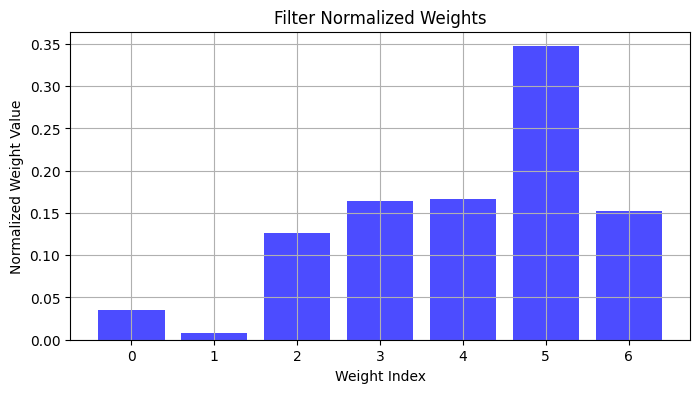

In [4]:
this = "Filter Normalized Weights"

import matplotlib.pyplot as plt

# Access the normalized weights
normalized_weights = m.filter.normalized_weights.data.cpu().numpy()

# Plot the normalized weights
plt.figure(figsize=(8, 4))
plt.bar(range(len(normalized_weights)), normalized_weights, color="blue", alpha=0.7)
plt.title(f"{this}")
plt.xlabel("Weight Index")
plt.ylabel("Normalized Weight Value")
plt.grid(True)
plt.show()

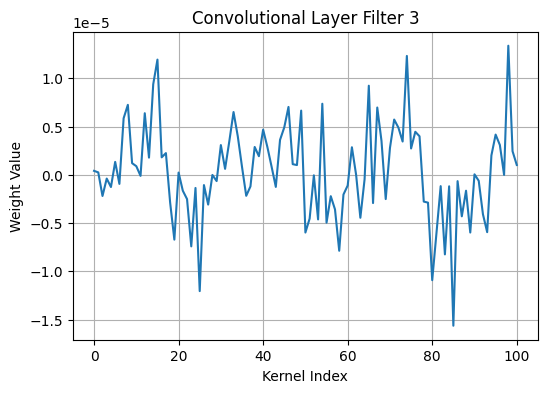

In [5]:
this = "Convolutional Layer Filter"

import matplotlib.pyplot as plt

# Get the weights of the convolutional layer
conv_layer = m.conv.f[0]
weights = conv_layer.weight.data.cpu()

# Specify the filter index to plot
filter_index = 2  # Change this to the index of the filter you want to visualize

# Plot the selected filter
plt.figure(figsize=(6, 4))
plt.plot(weights[filter_index, 0, :].numpy())  # Plot the 2D filter
plt.title(f"{this} {filter_index + 1}")
plt.xlabel("Kernel Index")
plt.ylabel("Weight Value")
plt.grid(True)
plt.show()

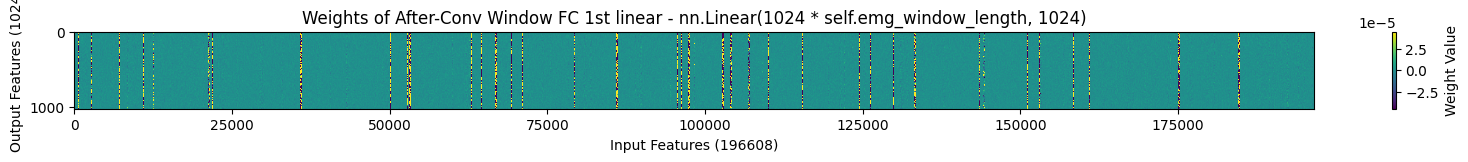

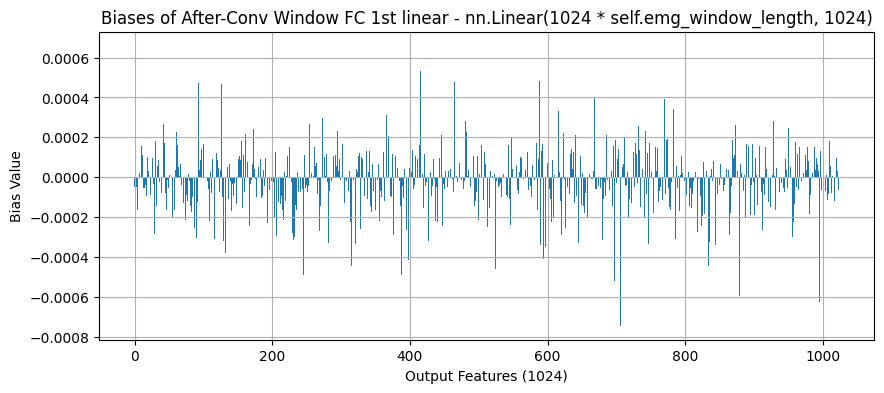

In [6]:
this = "After-Conv Window FC 1st linear - nn.Linear(1024 * self.emg_window_length, 1024)"

import matplotlib.pyplot as plt
import numpy as np

# Access the specific linear layer
linear_layer = m.conv.f[2]  # Assuming this is the `nn.Linear(1024 * self.emg_window_length, 1024)` layer

# Get the weights and biases
weights = linear_layer.weight.data.cpu()  # Shape: (1024, 1024 * self.emg_window_length)
biases = linear_layer.bias.data.cpu()  # Shape: (1024,)

# Compute vmin and vmax for better contrast
vmin, vmax = np.percentile(weights.numpy(), [5, 95])  # Use the 5th and 95th percentiles

# Visualize the weights as a heatmap
plt.figure(figsize=(20, 1))
plt.imshow(weights, aspect="auto", cmap="viridis", vmin=vmin, vmax=vmax)
plt.colorbar(label="Weight Value")
plt.title(f"Weights of {this}")
plt.xlabel(f"Input Features ({weights.shape[1]})")
plt.ylabel("Output Features (1024)")
plt.show()

# Visualize the biases as a bar plot
plt.figure(figsize=(10, 4))
plt.bar(range(len(biases)), biases.numpy())
plt.title(f"Biases of {this}")
plt.xlabel("Output Features (1024)")
plt.ylabel("Bias Value")
plt.grid(True)
plt.show()

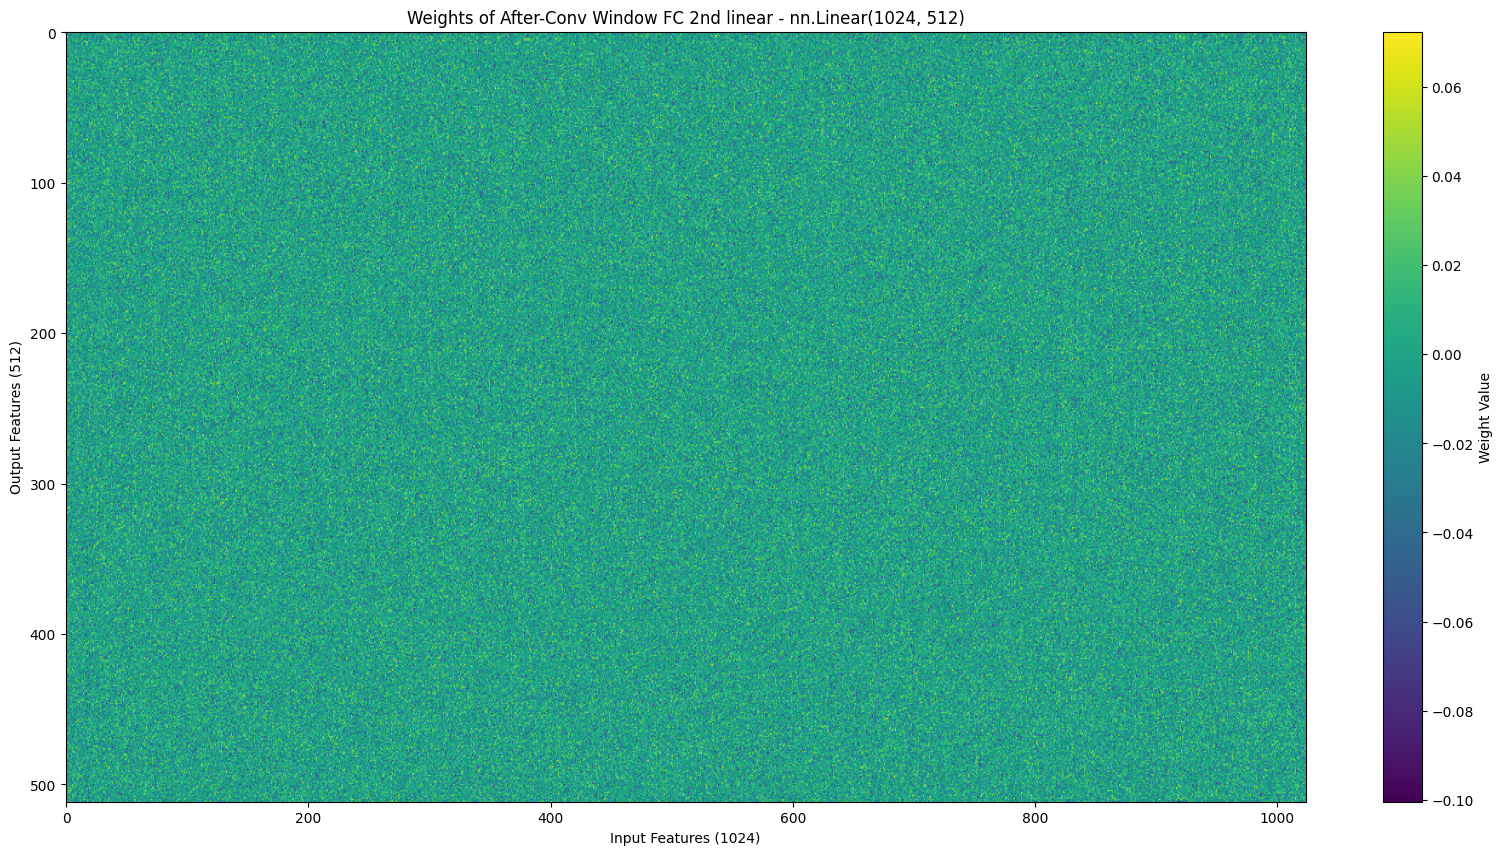

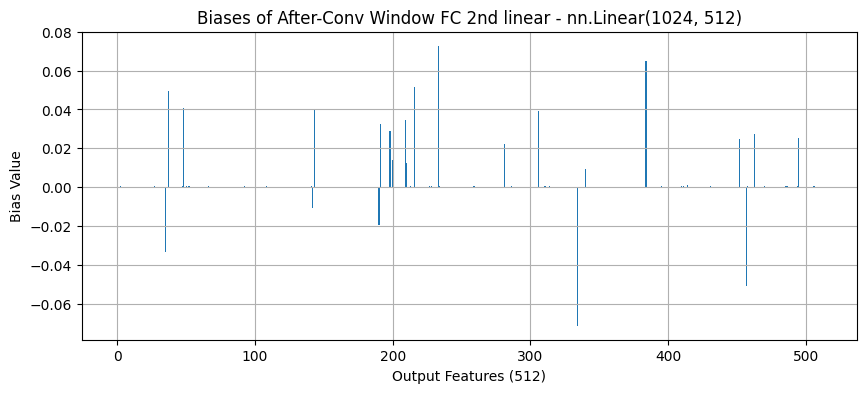

In [7]:
this = "After-Conv Window FC 2nd linear - nn.Linear(1024, 512)"

import matplotlib.pyplot as plt

# Access the specific linear layer
linear_layer = m.conv.f[4]  # Assuming this is the `nn.Linear(1024, 512)` layer

# Get the weights and biases
weights = linear_layer.weight.data.cpu()  # Shape: (512, 1024)
biases = linear_layer.bias.data.cpu()  # Shape: (512,)

# Visualize the weights as a heatmap
plt.figure(figsize=(20, 10))
plt.imshow(weights, aspect="auto", cmap="viridis")
plt.colorbar(label="Weight Value")
plt.title(f"Weights of {this}")
plt.xlabel("Input Features (1024)")
plt.ylabel("Output Features (512)")
plt.show()

# Visualize the biases as a bar plot
plt.figure(figsize=(10, 4))
plt.bar(range(len(biases)), biases.numpy())
plt.title(f"Biases of {this}")
plt.xlabel("Output Features (512)")
plt.ylabel("Bias Value")
plt.grid(True)
plt.show()

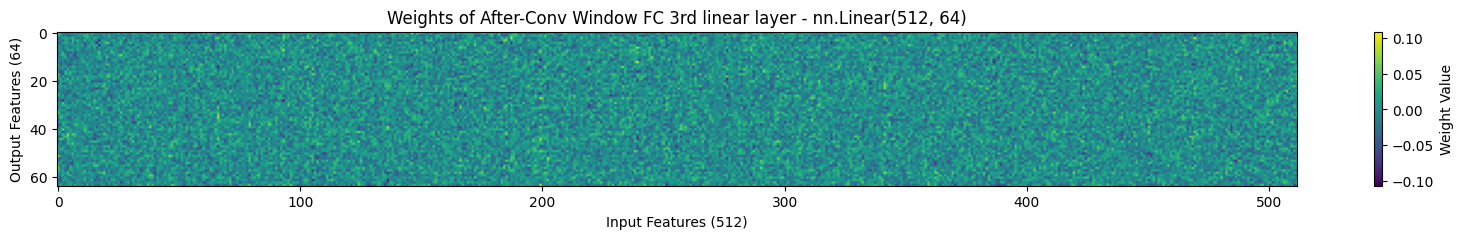

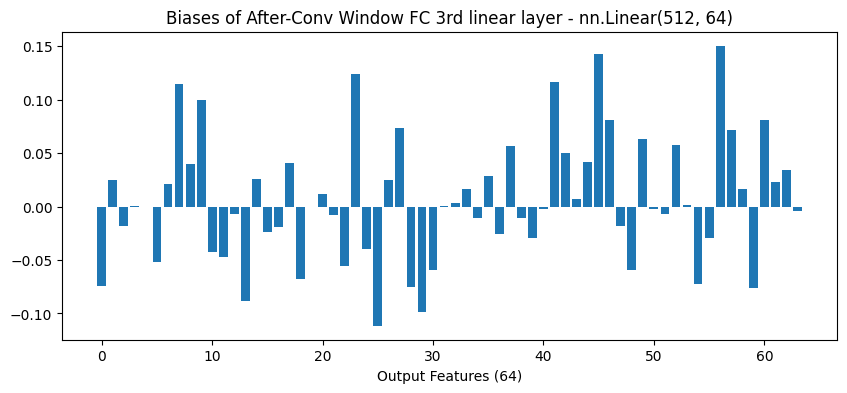

In [8]:
this = "After-Conv Window FC 3rd linear layer - nn.Linear(512, 64)"

import matplotlib.pyplot as plt

# Access the specific linear layer
linear_layer = m.conv.f[6]  # Assuming this is the `nn.Linear(512, 64)` layer

# Get the weights and biases
weights = linear_layer.weight.data.cpu()  # Shape: (64, 512)
biases = linear_layer.bias.data.cpu()  # Shape: (64,)

# Visualize the weights as a heatmap
plt.figure(figsize=(20, 2))
plt.imshow(weights, aspect="auto", cmap="viridis")
plt.colorbar(label="Weight Value")
plt.title(f"Weights of {this}")
plt.xlabel("Input Features (512)")
plt.ylabel("Output Features (64)")
plt.show()

# Visualize the biases as a bar plot
plt.figure(figsize=(10, 4))
plt.bar(range(len(biases)), biases.numpy())
plt.title(f"Biases of {this}")
plt.xlabel("Output Features (64)")
plt.show()

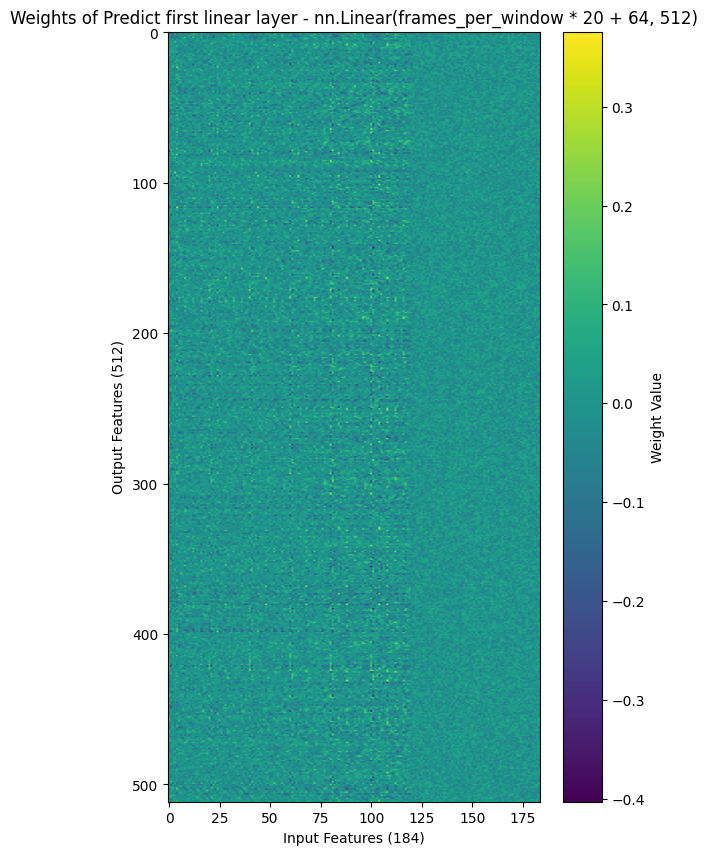

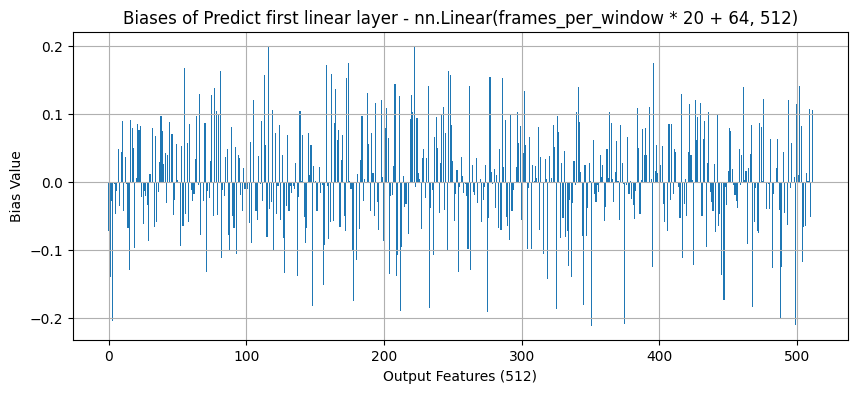

In [9]:
this = "Predict first linear layer - nn.Linear(frames_per_window * 20 + 64, 512)"

import matplotlib.pyplot as plt

# Access the specific linear layer
linear_layer = m.predict[0]  # Assuming this is the `nn.Linear(frames_per_window * 20 + 64, 512)` layer

# Get the weights and biases
weights = linear_layer.weight.data.cpu()  # Shape: (512, frames_per_window * 20 + 64)
biases = linear_layer.bias.data.cpu()  # Shape: (512,)

# Visualize the weights as a heatmap
plt.figure(figsize=(6, 10))
plt.imshow(weights, aspect="auto", cmap="viridis")
plt.colorbar(label="Weight Value")
plt.title(f"Weights of {this}")
plt.xlabel(f"Input Features ({weights.shape[1]})")
plt.ylabel("Output Features (512)")
plt.show()

# Visualize the biases as a bar plot
plt.figure(figsize=(10, 4))
plt.bar(range(len(biases)), biases.numpy())
plt.title(f"Biases of {this}")
plt.xlabel("Output Features (512)")
plt.ylabel("Bias Value")
plt.grid(True)
plt.show()

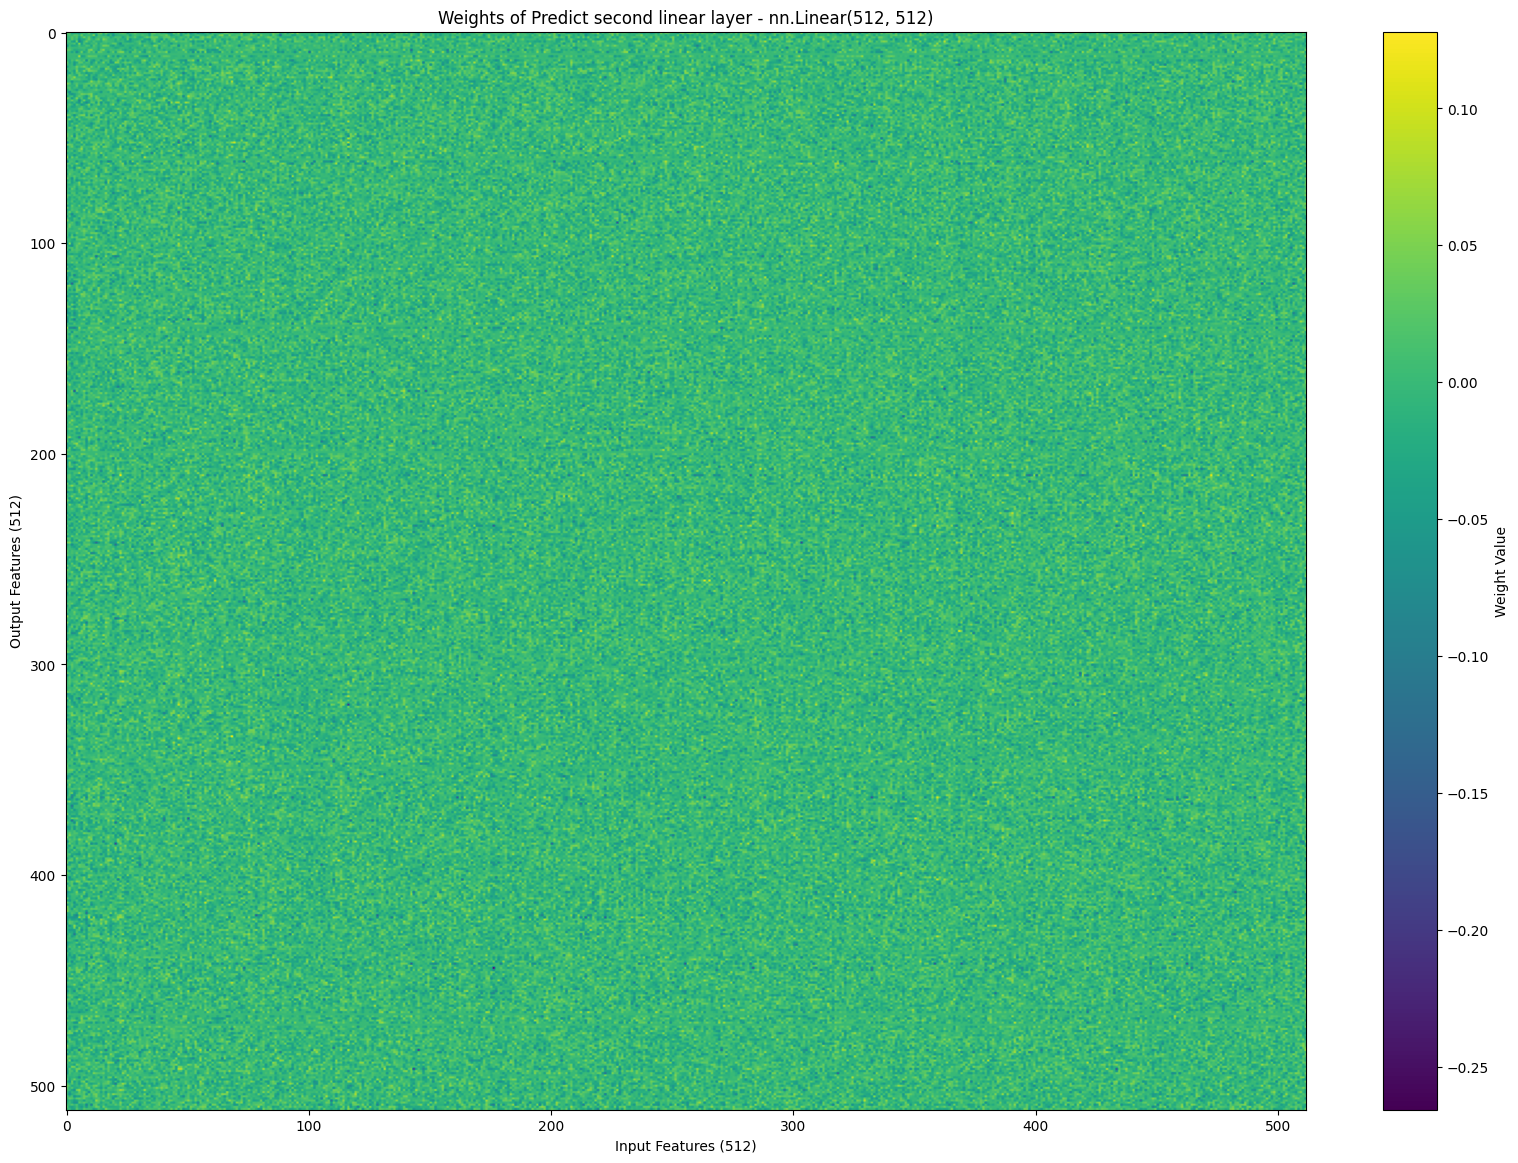

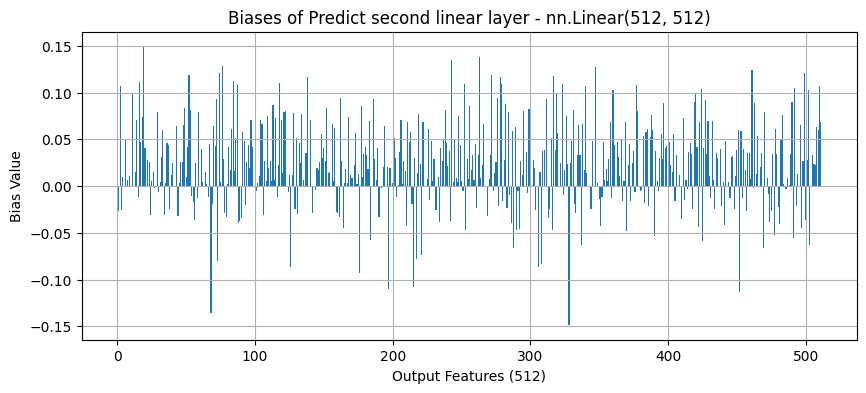

In [10]:
this = "Predict second linear layer - nn.Linear(512, 512)"

import matplotlib.pyplot as plt

# Access the specific linear layer
linear_layer = m.predict[2]  # Assuming this is the `nn.Linear(512, 512)` layer

# Get the weights and biases
weights = linear_layer.weight.data.cpu()  # Shape: (512, 512)
biases = linear_layer.bias.data.cpu()  # Shape: (512,)

# Visualize the weights as a heatmap
plt.figure(figsize=(20, 14))
plt.imshow(weights, aspect="auto", cmap="viridis")
plt.colorbar(label="Weight Value")
plt.title(f"Weights of {this}")
plt.xlabel(f"Input Features ({weights.shape[1]})")
plt.ylabel("Output Features (512)")
plt.show()

# Visualize the biases as a bar plot
plt.figure(figsize=(10, 4))
plt.bar(range(len(biases)), biases.numpy())
plt.title(f"Biases of {this}")
plt.xlabel("Output Features (512)")
plt.ylabel("Bias Value")
plt.grid(True)
plt.show()

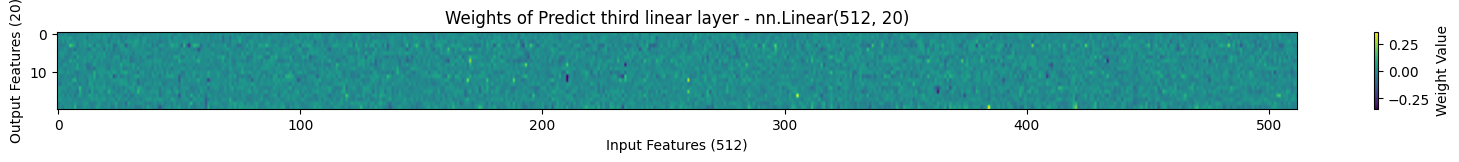

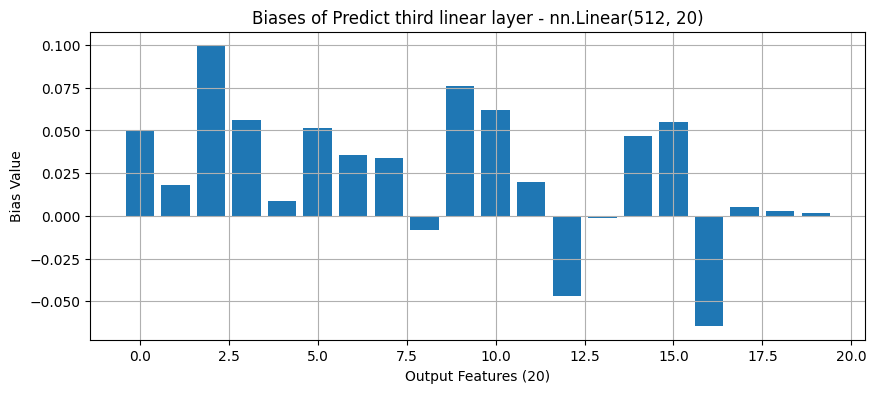

In [11]:
this = "Predict third linear layer - nn.Linear(512, 20)"

import matplotlib.pyplot as plt

# Access the specific linear layer
linear_layer = m.predict[4]  # Assuming this is the `nn.Linear(512, 20)` layer

# Get the weights and biases
weights = linear_layer.weight.data.cpu()  # Shape: (20, 512)
biases = linear_layer.bias.data.cpu()  # Shape: (20,)

# Visualize the weights as a heatmap
plt.figure(figsize=(20, 1))
plt.imshow(weights, aspect="auto", cmap="viridis")
plt.colorbar(label="Weight Value")
plt.title(f"Weights of {this}")
plt.xlabel(f"Input Features ({weights.shape[1]})")
plt.ylabel("Output Features (20)")
plt.show()

# Visualize the biases as a bar plot
plt.figure(figsize=(10, 4))
plt.bar(range(len(biases)), biases.numpy())
plt.title(f"Biases of {this}")
plt.xlabel("Output Features (20)")
plt.ylabel("Bias Value")
plt.grid(True)
plt.show()